In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [146]:
portfolio3 = pd.read_csv('dados/df_portfolio3.csv')
portfolio1 = pd.read_csv('dados/df_portfolio1.csv')
portfolio2 = pd.read_csv('dados/df_portfolio2.csv')
market = pd.read_csv('dados/market_clean_enconded.csv')
df_coordenada = pd.read_csv('dados/coord_geograficas_brasil.csv')
market_aux = pd.read_csv('dados/estaticos_market.csv')

In [73]:
df_coordenada.rename({'lng':'longitude','lat':'latitude'},axis=1, inplace=True)

In [74]:
df_coordenada.head()

,nm_uf,nm_micro,longitude,latitude
0,SAO PAULO,ADAMANTINA,-50.997688,-21.706115
1,ESPÍRITO SANTO,AFONSO CLAUDIO,-41.018390,-20.191878
2,MARANHÃO,AGLOMERACAO URBANA DE SAO LUIS,-44.142982,-2.562962
3,SERGIPE,AGRESTE DE ITABAIANA,-37.411976,-10.729138
4,SERGIPE,AGRESTE DE LAGARTO,-37.680786,-10.921736


In [3]:
portfolio2.shape

(566, 41)

In [5]:
portfolio1.shape

(555, 41)

In [6]:
portfolio3.shape

(265, 41)

In [75]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)
market_aux = market_aux.drop(['Unnamed: 0'], axis = 1)

In [76]:
market_aux = market_aux.merge(df_coordenada, how='left',left_on='nm_micro_regiao',right_on='nm_micro')

In [77]:
market_aux.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me',
       ...
       'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais', 'nm_uf', 'nm_micro', 'longitude', 'latitude'],
      dtype='object', length=185)

In [78]:
market_aux = market_aux[['id','nm_micro_regiao','latitude','longitude']]

In [8]:
market_noID = market.copy()

In [9]:
market_noID.drop('id',axis=1,inplace=True)

In [10]:
market_noID.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,...,32,10,19,4,0,0,6,48,2,2
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,...,3,3,16,2,1,1,4,69,10,10
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,...,86,20,2,0,0,2,2,43,1,1
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,...,74,17,2,0,0,2,2,43,10,10
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,...,77,8,19,4,0,0,6,48,10,10


In [11]:
market_noID.shape

(462298, 39)

## Modelo com o KMeans

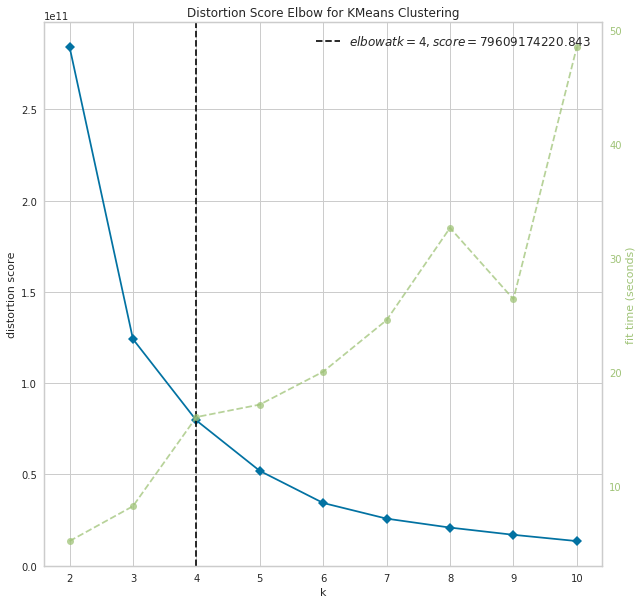

In [15]:
model = KMeans()
plt.figure(figsize=(10,10))

visualizer = KElbowVisualizer(model)
visualizer.fit(market_noID)    


sns.set_style('whitegrid')
# Fit the data to the visualizer
visualizer.show() 

In [129]:
from sklearn.metrics import silhouette_score

In [130]:
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [131]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter= 1000)
    preds = clusterer.fit_predict(market_noID)
    centers = clusterer.cluster_centers_
    score = silhouette_score(market_noID, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6622074882212988)
For n_clusters = 3, silhouette score is 0.6391474122585765)
For n_clusters = 4, silhouette score is 0.6081618700263988)
For n_clusters = 5, silhouette score is 0.6188027211514596)
For n_clusters = 6, silhouette score is 0.6097634385989278)
For n_clusters = 7, silhouette score is 0.5980989521770838)
For n_clusters = 8, silhouette score is 0.5796459722396373)
For n_clusters = 9, silhouette score is 0.5676021106938162)


In [138]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
km = km.fit(market_noID)

In [139]:
y_pred = km.predict(market_noID)

pd.DataFrame(y_pred)[0].value_counts()

0    248364
1    213934
Name: 0, dtype: int64

In [81]:
#Criando uma coluna com os resultados das predições
X_train = market_noID.copy()
X_train['km'] = km.predict(market_noID)

In [82]:
#verificando se a coluna foi criada
X_train.columns

Index(['idade_empresa_anos', 'vl_total_veiculos_pesados_grupo',
       'vl_total_veiculos_leves_grupo', 'nu_meses_rescencia',
       'empsetorcensitariofaixarendapopulacao', 'qt_socios',
       'idade_media_socios', 'qt_socios_feminino',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'fl_matriz', 'fl_me', 'fl_sa', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_email', 'fl_telefone', 'fl_rm',
       'fl_optante_simples', 'fl_passivel_iss', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_emp_cat',
       'dt_situacao', 'nm_divisao', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo', 'km'],
      dtype='object')

In [140]:
y_pred_1 = km.predict(portfolio1.drop('id',axis=1))
y_pred_2 = km.predict(portfolio2.drop('id',axis=1))
y_pred_3 = km.predict(portfolio3.drop('id',axis=1))

In [141]:
pd.DataFrame(y_pred_1)[0].value_counts()

0    295
1    260
Name: 0, dtype: int64

In [142]:
pd.DataFrame(y_pred_2)[0].value_counts()

1    565
0      1
Name: 0, dtype: int64

In [143]:
pd.DataFrame(y_pred_3)[0].value_counts()

1    249
0     16
Name: 0, dtype: int64

In [88]:
d = km.transform(market_noID)[:, 0]
ind = np.argsort(d)[::][:200]

In [89]:
clusters1_market = market_noID.loc[ind]

In [90]:
clusters1_market['id'] = market['id']

In [91]:
clusters1_market.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
399386,0.356078,-0.049577,-0.039611,2.392188,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,10,9,0,0,2,3,44,10,10,4ee92d6e7359ca83b7bf7f5163e01c73cc799abf2ed5c8...
285407,1.168395,-0.049577,-0.040442,-0.327103,-2.691290e-01,2.345859e-16,0.010406,0.0,-0.008173,-0.048722,...,9,16,3,0,1,9,38,7,7,99ed66311f37e91efabb969d286ef2ec2bdedeb05ccdb3...
430576,1.852212,-0.049577,-0.040442,-0.109560,-9.726257e-01,-1.747865e-01,1.128713,0.0,-0.019695,-0.048772,...,9,9,3,0,1,8,37,10,10,4e5def212d0296e1971265fb40008f426096208b0859c3...
61063,0.355224,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,16,3,0,1,9,38,10,10,925aa7b2a4cf24d6bfac49ef9688e4bfac69831b646274...
181114,0.668070,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,9,1,0,2,3,44,10,10,929259c9a8e2e479bdaa03599b7dc83beeba4cb2832741...


## Market Clusters id

In [92]:
# Cria um dataframe para exibir os cluster que cada linha pertence
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_train.index.values
#cluster_map['id'] = X_train.id
cluster_map['cluster'] = y_pred

In [93]:
cluster_map.head()

,data_index,cluster
0,0,0
1,1,3
2,2,2
3,3,2
4,4,1


In [94]:
X_train.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,km
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,...,10,19,4,0,0,6,48,2,2,0
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,...,3,16,2,1,1,4,69,10,10,3
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,...,20,2,0,0,2,2,43,1,1,2
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,...,17,2,0,0,2,2,43,10,10,2
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,...,8,19,4,0,0,6,48,10,10,1


In [95]:
cluster_map['id'] = market['id']

In [96]:
cluster_map.head()

,data_index,cluster,id
0,0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,1,3,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,3,2,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,4,1,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [97]:
cluster_map_cluster1 = cluster_map[cluster_map['cluster'] ==1]

In [98]:
cluster_map[cluster_map['cluster']==1].head()

,data_index,cluster,id
4,4,1,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...
13,13,1,1e954ad5e6a5b7af8582da953709cd702a2f5e5d674361...
17,17,1,82aa41448d40afef92908fdfaa7070b2eedb2ffacb1016...
18,18,1,9907170763d88708043f32bc265fbf544d69f966052920...
19,19,1,3d280e33e53e6fa5d63791f1eaf0207f2c079d1d713175...


## Portfólio 1 clusters

In [99]:
# Cria um dataframe para exibir os cluster que cada linha pertence
cluster_map1 = pd.DataFrame()
cluster_map1['data_index'] = portfolio1.index.values
#cluster_map['id'] = X_train.id
cluster_map1['cluster'] = y_pred_1

In [100]:
cluster_map1.head()

,data_index,cluster
0,0,3
1,1,2
2,2,2
3,3,0
4,4,0


In [101]:
cluster_map1['id'] = portfolio1['id']

In [102]:
cluster_map1.head()

,data_index,cluster,id
0,0,3,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...
1,1,2,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...
2,2,2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...
3,3,0,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...
4,4,0,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...


In [103]:
cluster_map1_cluster1 = cluster_map1[cluster_map1['cluster'] ==1]

## Portfólio 2 clusters

In [104]:
# Cria um dataframe para exibir os cluster que cada linha pertence
cluster_map2 = pd.DataFrame()
cluster_map2['data_index'] = portfolio2.index.values
#cluster_map['id'] = X_train.id
cluster_map2['cluster'] = y_pred_2
cluster_map2['id'] = portfolio2['id']

In [105]:
cluster_map2.head()

,data_index,cluster,id
0,0,0,09e95c1a84049001d086470a8f320a19b076f955a89122...
1,1,0,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...
2,2,0,16843c9ffb920170477118933798510d8d5f00f5c56c12...
3,3,0,ff045934d90aab184dd15e66daf3b3c97193bda5449298...
4,4,0,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...


In [106]:
cluster_map2_cluster1 = cluster_map2[cluster_map2['cluster'] ==1]

## Portfólio 3 clusters

In [107]:
# Cria um dataframe para exibir os cluster que cada linha pertence
cluster_map3 = pd.DataFrame()
cluster_map3['data_index'] = portfolio3.index.values
#cluster_map['id'] = X_train.id
cluster_map3['cluster'] = y_pred_3
cluster_map3['id'] = portfolio3['id']

In [108]:
cluster_map3.head()

,data_index,cluster,id
0,0,0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...
1,1,0,16843c9ffb920170477118933798510d8d5f00f5c56c12...
2,2,0,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...
3,3,0,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...
4,4,0,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...


In [109]:
cluster_map3_cluster1 = cluster_map3[cluster_map3['cluster'] ==1]

In [110]:
cluster_map_cluster1.shape

(102261, 3)

In [111]:
cluster_map3_cluster1.shape

(11, 3)

## Removendo ids iguais

In [112]:
merge_not1 = clusters1_market[~clusters1_market['id'].isin(cluster_map1_cluster1['id'])]

In [113]:
merge_not1.shape

(200, 40)

In [114]:
merge_not2 = clusters1_market[~clusters1_market['id'].isin(cluster_map2_cluster1['id'])]

In [115]:
merge_not2.shape

(200, 40)

In [116]:
merge_not3 = clusters1_market[~clusters1_market['id'].isin(cluster_map3_cluster1['id'])]

In [117]:
merge_not3.shape

(200, 40)

## Concatenando o portfólio com os novos clientes

In [118]:
port1_semclientesnovos = merge_not1.copy()
port2_semclientesnovos = merge_not2.copy()
port3_semclientesnovos = merge_not3.copy()

In [119]:
port1_semclientesnovos['cliente'] = 'True'
port2_semclientesnovos['cliente'] = 'True'
port3_semclientesnovos['cliente'] = 'True'

In [120]:
novos_clientes = clusters1_market.copy()

In [121]:
novos_clientes['cliente'] = 'False'

In [122]:
port1_comcliente = pd.concat([port1_semclientesnovos,novos_clientes ],axis=0)
port2_comcliente = pd.concat([port2_semclientesnovos,novos_clientes ],axis=0)
port3_comcliente = pd.concat([port2_semclientesnovos,novos_clientes ],axis=0)

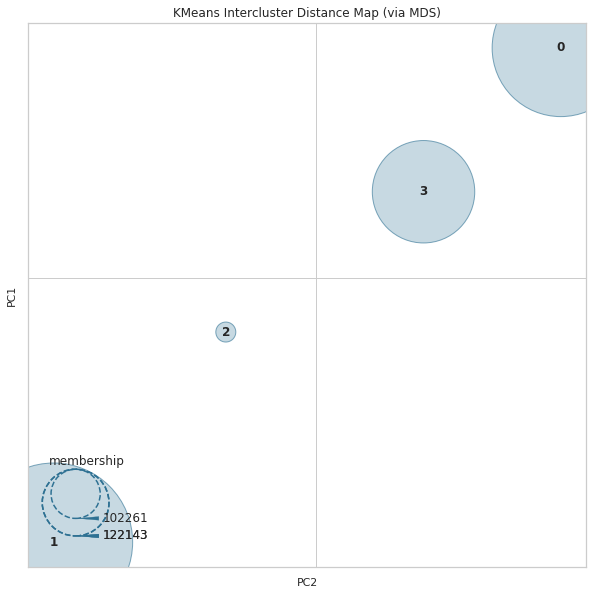

In [123]:
#Verificando as distancias entre os novos clusters criados
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model = KMeans(4)
plt.figure(figsize=(10,10))
visualizer = InterclusterDistance(model)
visualizer.fit(X_train)
sns.set_style('whitegrid')

visualizer.show()    

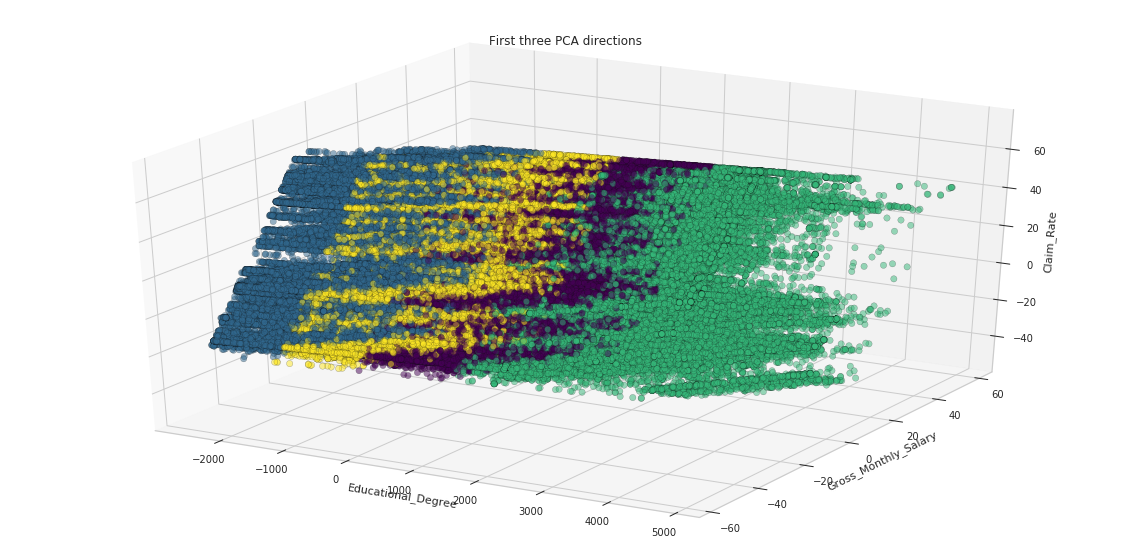

In [51]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(market_noID)

kmeans_PCA = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")
ax.set_xlabel("Educational_Degree")
ax.set_ylabel("Gross_Monthly_Salary")
ax.set_zlabel("Claim_Rate")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

In [52]:
sample_market =market_noID.sample(frac = .01)

In [53]:
sample_market.shape

(4623, 39)

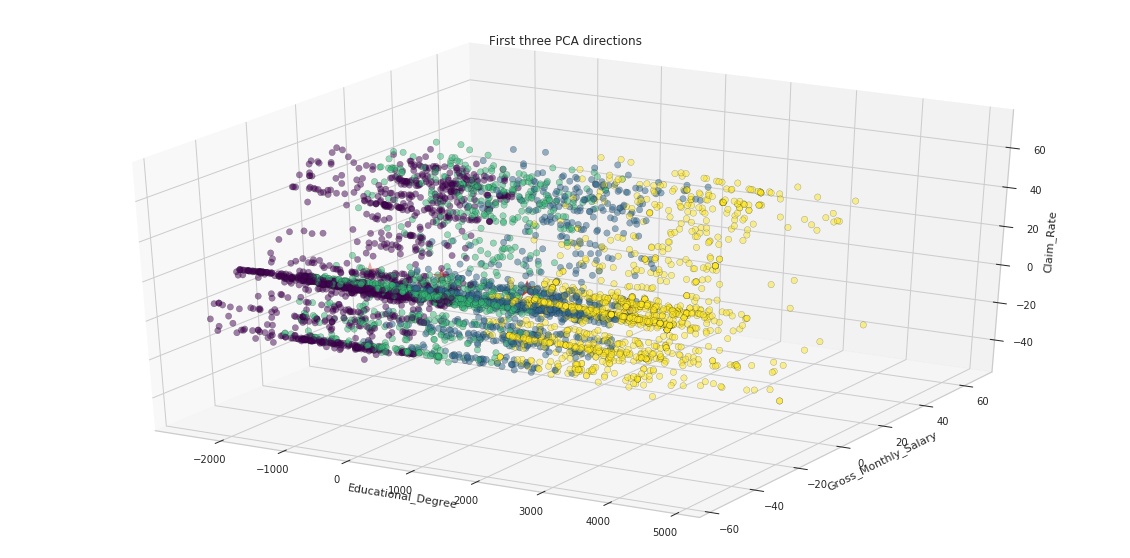

In [73]:
pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(sample_market)

kmeans_PCA = KMeans(n_clusters=4, init='k-means++', max_iter= 300, n_init= 10, random_state= 42)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")
ax.set_xlabel("Educational_Degree")
ax.set_ylabel("Gross_Monthly_Salary")
ax.set_zlabel("Claim_Rate")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

## Métrica

In [69]:
km.cluster_centers_

array([[-8.80789153e-01, -3.61575113e-02, -3.28889082e-02,
        -5.84283902e-01, -2.06901619e-02, -8.73475697e-02,
        -4.85468633e-01, -4.34982118e-02, -1.34049528e-02,
        -2.89251222e-02, -4.77284132e-02,  9.55996492e-01,
         6.63863687e-04,  9.57275044e-03,  6.54364699e-01,
         1.09824363e-03,  8.19584798e-06,  6.65633990e-01,
         9.44891118e-01,  5.19772483e-01,  9.44874726e-01,
         6.18704564e-01,  2.11402146e+01,  2.73910977e+00,
         4.57961037e+00,  1.35879701e+01,  2.51578930e+00,
         1.55233459e+00,  6.84599572e+03,  3.82210830e+01,
         1.01352151e+01,  1.22521371e+01,  3.06253432e+00,
         1.83456681e+00,  1.44293641e+00,  8.24948981e+00,
         4.17679919e+01,  8.34569267e+00,  7.97146206e+00],
       [ 1.17677431e+00,  4.13386159e-02,  4.71319465e-02,
         2.18808666e-01,  6.68882526e-02,  7.86927675e-02,
         4.49646684e-01,  5.01872637e-02,  2.79510307e-02,
         3.61197359e-02,  5.91875237e-02,  9.18935798e-

In [70]:
market_noID.shape

(462298, 39)

# Mapas

In [124]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [125]:
def mapa(df):
    colors = {
     'True': 'pink',
     'False': 'green'
    }

    mapa = folium.Map(
        location=[-7.9981267, -34.9082027],
        zoom_start=13
    )
    # I can add marker one by one on the map
    for i in range(0,len(df)):
        folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']],\
                      popup = df.iloc[i]['cliente'],\
                      icon=folium.Icon(icon='ok',color=colors[df.iloc[i]['cliente']])).add_to(mapa)
    return mapa

In [126]:
mapa(port1_comcliente.merge(market_aux, how='left',left_on='id',right_on='id'))

In [127]:
mapa(port2_comcliente.merge(market_aux, how='left',left_on='id',right_on='id'))

In [128]:
mapa(port3_comcliente.merge(market_aux, how='left',left_on='id',right_on='id'))